<a href="https://colab.research.google.com/github/swellcloud/wavebuoys/blob/main/46084_wavebuoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

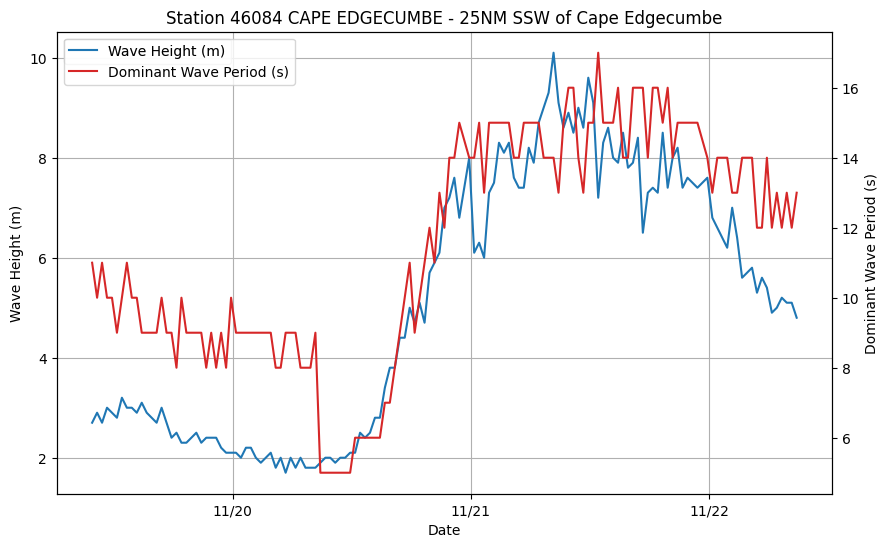

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
#To make plot
from scipy.interpolate import make_interp_spline, BSpline
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator
#To make plot interactive export D3
#import mpld3
# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

from siphon.simplewebservice.ndbc import NDBC

data_types = NDBC.buoy_data_types('46084')

df = NDBC.realtime_observations('46084')

df.dropna(subset=['wave_height', 'dominant_wave_period'], inplace = True)

import pandas as pd
#show all rows on print function
pd.set_option('display.max_rows', df.shape[0]+1)
idx = df.time >= (pd.Timestamp.utcnow() - pd.Timedelta(days=3))
df = df[idx]
# Show dataframe
#df

#Lets make the plot and determine the size
fig, ax = plt.subplots(figsize=(10, 6))
#This creates a twin axes for the wave period
axb = ax.twinx()

# Labels for what we are plotting
ax.set_xlabel('Date')
ax.set_ylabel('Wave Height (m)')
ax.set_title('Station 46084 CAPE EDGECUMBE - 25NM SSW of Cape Edgecumbe')
ax.grid(True)
ax.legend(loc='upper left');

# Lets try and smooth out the plot
# df['mov_avg'] = df['new_cases'].rolling(7).sum()
#df.resample("time").median().plot(figsize=(15,4))


# Plotting on the first y-axis
ax.plot(df.time, df.wave_height, color='tab:blue', label='Wave Height (m)')
#ax.plot(df.time, df.dominant_wave_period, color='tab:red', linestyle='--', label='Dominant Wave Period')
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Dominant Wave Period (s)')
axb.plot(df.time, df.dominant_wave_period, color='tab:red', label='Dominant Wave Period (s)')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

fig.savefig('46084.png')




